In [24]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel as C ,WhiteKernel)
#np.random.seed(1)

In [25]:
def  f(x):
    return x**3

In [26]:
N=20
#rng = np.random.RandomState(1)
x_train=np.random.uniform(low=-4, high=4, size=(N,))
y_train=f(x_train)+np.random.normal(loc=0., scale=9., size=(N,))


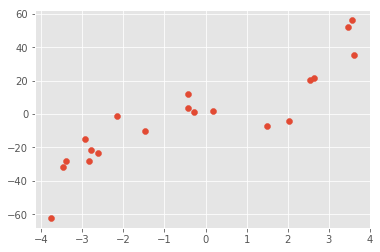

In [27]:
plt.scatter(x_train, y_train)
plt.show()

In [28]:
"""
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]
                        
"""

'\nkernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),\n           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),\n           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,\n                                length_scale_bounds=(0.1, 10.0),\n                                periodicity_bounds=(1.0, 10.0)),\n           ConstantKernel(0.1, (0.01, 10.0))\n               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),\n           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),\n                        nu=1.5)]\n                        \n'

In [35]:
#kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=0.1)
#kernel = C(1., (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))+ WhiteKernel(noise_level=1.)

kernel=1.* RBF(1, (1e-2, 1e2))+ WhiteKernel(noise_level=9.)

In [36]:
x_train=x_train.reshape(-1,1)

In [37]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
gp.fit(x_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=9),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [38]:
gp.kernel_

33.4**2 * RBF(length_scale=1.41) + WhiteKernel(noise_level=76.5)

In [39]:
x_pred = np.linspace(-6., 6., 500).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

(-100, 100)

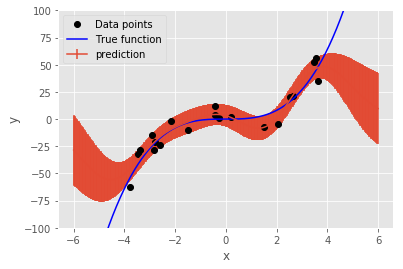

In [40]:
plt.errorbar(x_pred, y_pred, yerr=sigma, capsize=0)
#plt.fill(np.concatenate([x_pred, x_pred[::-1]]), np.concatenate([y_pred - 1.9600 * sigma,
 #                       (y_pred + 1.9600 * sigma)[::-1]]),
 #        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.plot(x_train, y_train, "ko")
plt.plot(x_pred, f(x_pred), "b")
plt.legend(['Data points','True function','prediction'])
plt.xlabel('x')
plt.ylabel('y')

plt.ylim(-100,100)